# PostClassicalOptimization

In [ ]:
# This code explains the Sample dictionary which contains the rydberg density mapped to the coordinates of the atoms

Length MIS: 2


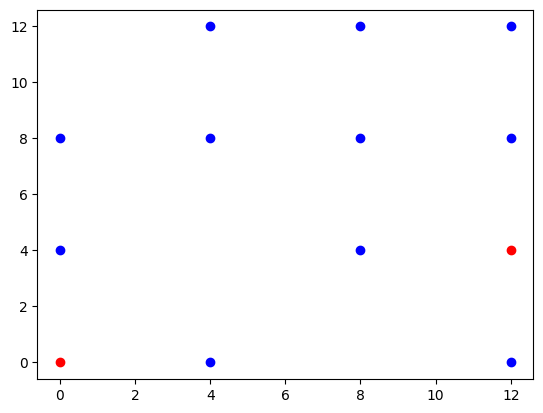

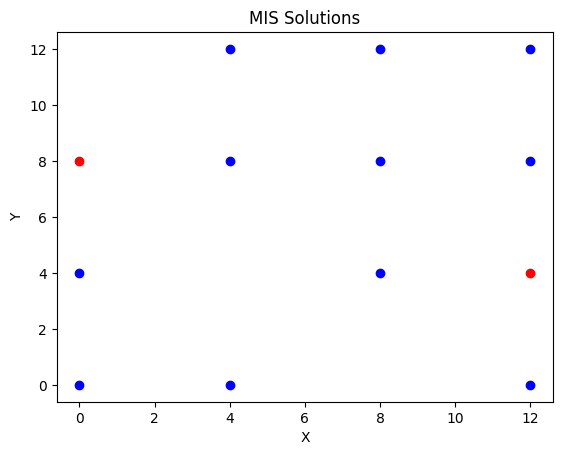

In [1]:
from itertools import combinations
import matplotlib.pyplot as plt
import numpy as np

dict1 = {
    0.2: (0, 0),
    0.7: (0, 4),
    0.1: (0, 8),
    0.8: (4, 0),
    0.65: (4, 8),
    0.775: (4, 12),
    0.825: (8, 4),
    0.85: (8, 8),
    0.875: (8, 12),
    0.9: (12, 0),
    0.15: (12, 4),
    0.75: (12, 8),
    0.675: (12, 12)
}

n = 13  # The side length of the king's lattice

f = 1 / n

# Step 1: Calculate the threshold
threshold = f * sum(dict1.keys())

# Step 2: Create list with values where key < threshold
points = [v for k, v in dict1.items() if k < threshold]

# Function to calculate the Euclidean distance between two points
def euclidean_distance(p1, p2):
    return np.sqrt((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)


# find the largest subsets of points with distances between each pair  > 3
n2 = len(points)
valid_subsets = []
lMIS = 0
for r in range(n2, 0, -1):
    combs = list(combinations(points, r))
    combs_as_lists = [list(comb) for comb in combs]
    t = False
    for subset in combs_as_lists:
        if all(euclidean_distance(subset[i], subset[j]) > 12 for i in range(len(subset)) for j in range(i + 1, len(subset))):
            valid_subsets.append(subset)
            t = True
    if t:
        lMIS = r
        break


print(f"Length MIS: {lMIS}")

# Iterate over each subset
for subset in valid_subsets:
    plt.figure()  # Create a new figure for each subset
    # Plot all points in dict1 in blue
    for k, point in dict1.items():
        if point in subset:
            # Points in the subset are plotted in red
            plt.plot(point[0], point[1], 'ro')  # 'ro' = red circle marker
        else:
            # Other points are plotted in blue
            plt.plot(point[0], point[1], 'bo')  # 'bo' = blue circle marker

plt.xlabel('X')
plt.ylabel('Y')
plt.title('MIS Solutions')
plt.show()